In [1]:
import pandas as pd
import numpy as np
 
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest


In [3]:
df = pd.read_csv('../dataset/이자보상배율최종.csv', encoding='CP949')
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [10]:
df_n = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

In [11]:
list = [10000,9000,8000,7000,6000,5000,4000, 3000, 2000]
df_c = df_n.columns.tolist()

## 샤피로 테스트
- 데이터의 수가 많아 샤피로 테스트는 의미가없다

In [12]:
for i in list:
    df_k = df.sample(n=i, random_state=3)
    for j in df_c:
        a = stats.shapiro(df_k[j])
        p = a.pvalue
        if p < 0.1:
            print(i,j,p)
            continue
        else :
            print(i,p)
            break

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


10000 [제조]매출액증가율 0.0
10000 [제조]유형자산증가율 0.0
10000 [제조]비유동자산증가율 0.0
10000 [제조]총자본증가율 0.0
10000 [제조]자기자본증가율 0.0
10000 [제조]유동자산증가율 0.0
10000 [제조]순이익증가율 0.0
10000 [제조]재고자산증가율 0.0
10000 [제조]매출액총이익률 0.0
10000 [제조]매출액순이익률 0.0
10000 [제조]총자본사업이익률 0.0
10000 [제조]총자본순이익률 0.0
10000 [제조]자기자본순이익률 0.0
10000 [제조]1주당순이익 0.0
10000 [제조]1주당매출액 0.0
10000 [제조]총자본회전률 0.0
10000 [제조]자기자본회전률 0.0
10000 [제조]비유동자산회전률 0.0
10000 [제조]재고자산회전률 0.0
10000 [제조]매출채권회전률 0.0
10000 [제조]매입채무회전률 0.0
10000 [제조]매입채무회전기간 0.0
10000 [제조]재고자산회전기간 0.0
10000 [제조]매출채권회전기간 0.0
10000 [제조]1회전기간 0.0
10000 [제조]운전자본회전률 0.0
10000 [제조]순운전자본회전률 0.0
10000 [제조]유동자산회전률 0.0
10000 [제조]당좌자산회전률 0.0
10000 [제조]유동비율 0.0
10000 [제조]당좌비율 0.0
10000 [제조]현금비율 0.0
10000 [제조]부채비율 0.0
10000 [제조]순운전자본비율 0.0
10000 [제조]자기자본배율 0.0
10000 [제조]비유동비율 0.0
10000 [제조]유동자산구성비율 7.287782539716538e-15
10000 [제조]자기자본구성비율 2.1474618706084957e-40
10000 [제조]부가가치 0.0
10000 [제조]총자본투자효율 0.0
10000 [제조]설비투자효율 0.0
10000 [제조]기계투자효율 0.0
10000 [제조]부가가치율 0.0
10000 [제조]노동소득분배율 0.0
10000 [제조]자본분배율

## KS Test
- KS 테스트가 데이터가 많을때 유용하긴 하나 데이터의 수가 너무 많아 정확한 값을 측정하지 못함

In [13]:
for i in list:
    df_k = df.sample(n=i, random_state=3)
    for j in df_c:
        a = kstest(df_k[j],'norm')
        p = a.pvalue
        if p < 0.1:
            print(i,j,p)
            continue
        else :
            print(i,p)
            break

10000 [제조]매출액증가율 0.0
10000 [제조]유형자산증가율 0.0
10000 [제조]비유동자산증가율 0.0
10000 [제조]총자본증가율 0.0
10000 [제조]자기자본증가율 0.0
10000 [제조]유동자산증가율 0.0
10000 [제조]순이익증가율 0.0
10000 [제조]재고자산증가율 0.0
10000 [제조]매출액총이익률 0.0
10000 [제조]매출액순이익률 0.0
10000 [제조]총자본사업이익률 0.0
10000 [제조]총자본순이익률 0.0
10000 [제조]자기자본순이익률 0.0
10000 [제조]1주당순이익 0.0
10000 [제조]1주당매출액 0.0
10000 [제조]총자본회전률 0.0
10000 [제조]자기자본회전률 0.0
10000 [제조]비유동자산회전률 0.0
10000 [제조]재고자산회전률 0.0
10000 [제조]매출채권회전률 0.0
10000 [제조]매입채무회전률 0.0
10000 [제조]매입채무회전기간 0.0
10000 [제조]재고자산회전기간 0.0
10000 [제조]매출채권회전기간 0.0
10000 [제조]1회전기간 0.0
10000 [제조]운전자본회전률 0.0
10000 [제조]순운전자본회전률 0.0
10000 [제조]유동자산회전률 0.0
10000 [제조]당좌자산회전률 0.0
10000 [제조]유동비율 0.0
10000 [제조]당좌비율 0.0
10000 [제조]현금비율 0.0
10000 [제조]부채비율 0.0
10000 [제조]순운전자본비율 0.0
10000 [제조]자기자본배율 0.0
10000 [제조]비유동비율 0.0
10000 [제조]유동자산구성비율 0.0
10000 [제조]자기자본구성비율 0.0
10000 [제조]부가가치 0.0
10000 [제조]총자본투자효율 0.0
10000 [제조]설비투자효율 0.0
10000 [제조]기계투자효율 0.0
10000 [제조]부가가치율 0.0
10000 [제조]노동소득분배율 0.0
10000 [제조]자본분배율 0.0
10000 [제조]이윤분배율 0.0
10000 [제조]유형

## Histogram
- 대략적인 정규성을 확인하려고 Histogram 제작
- 확인 결과 한쪽으로 몰린 값이 많이나와 윈저화를 시도

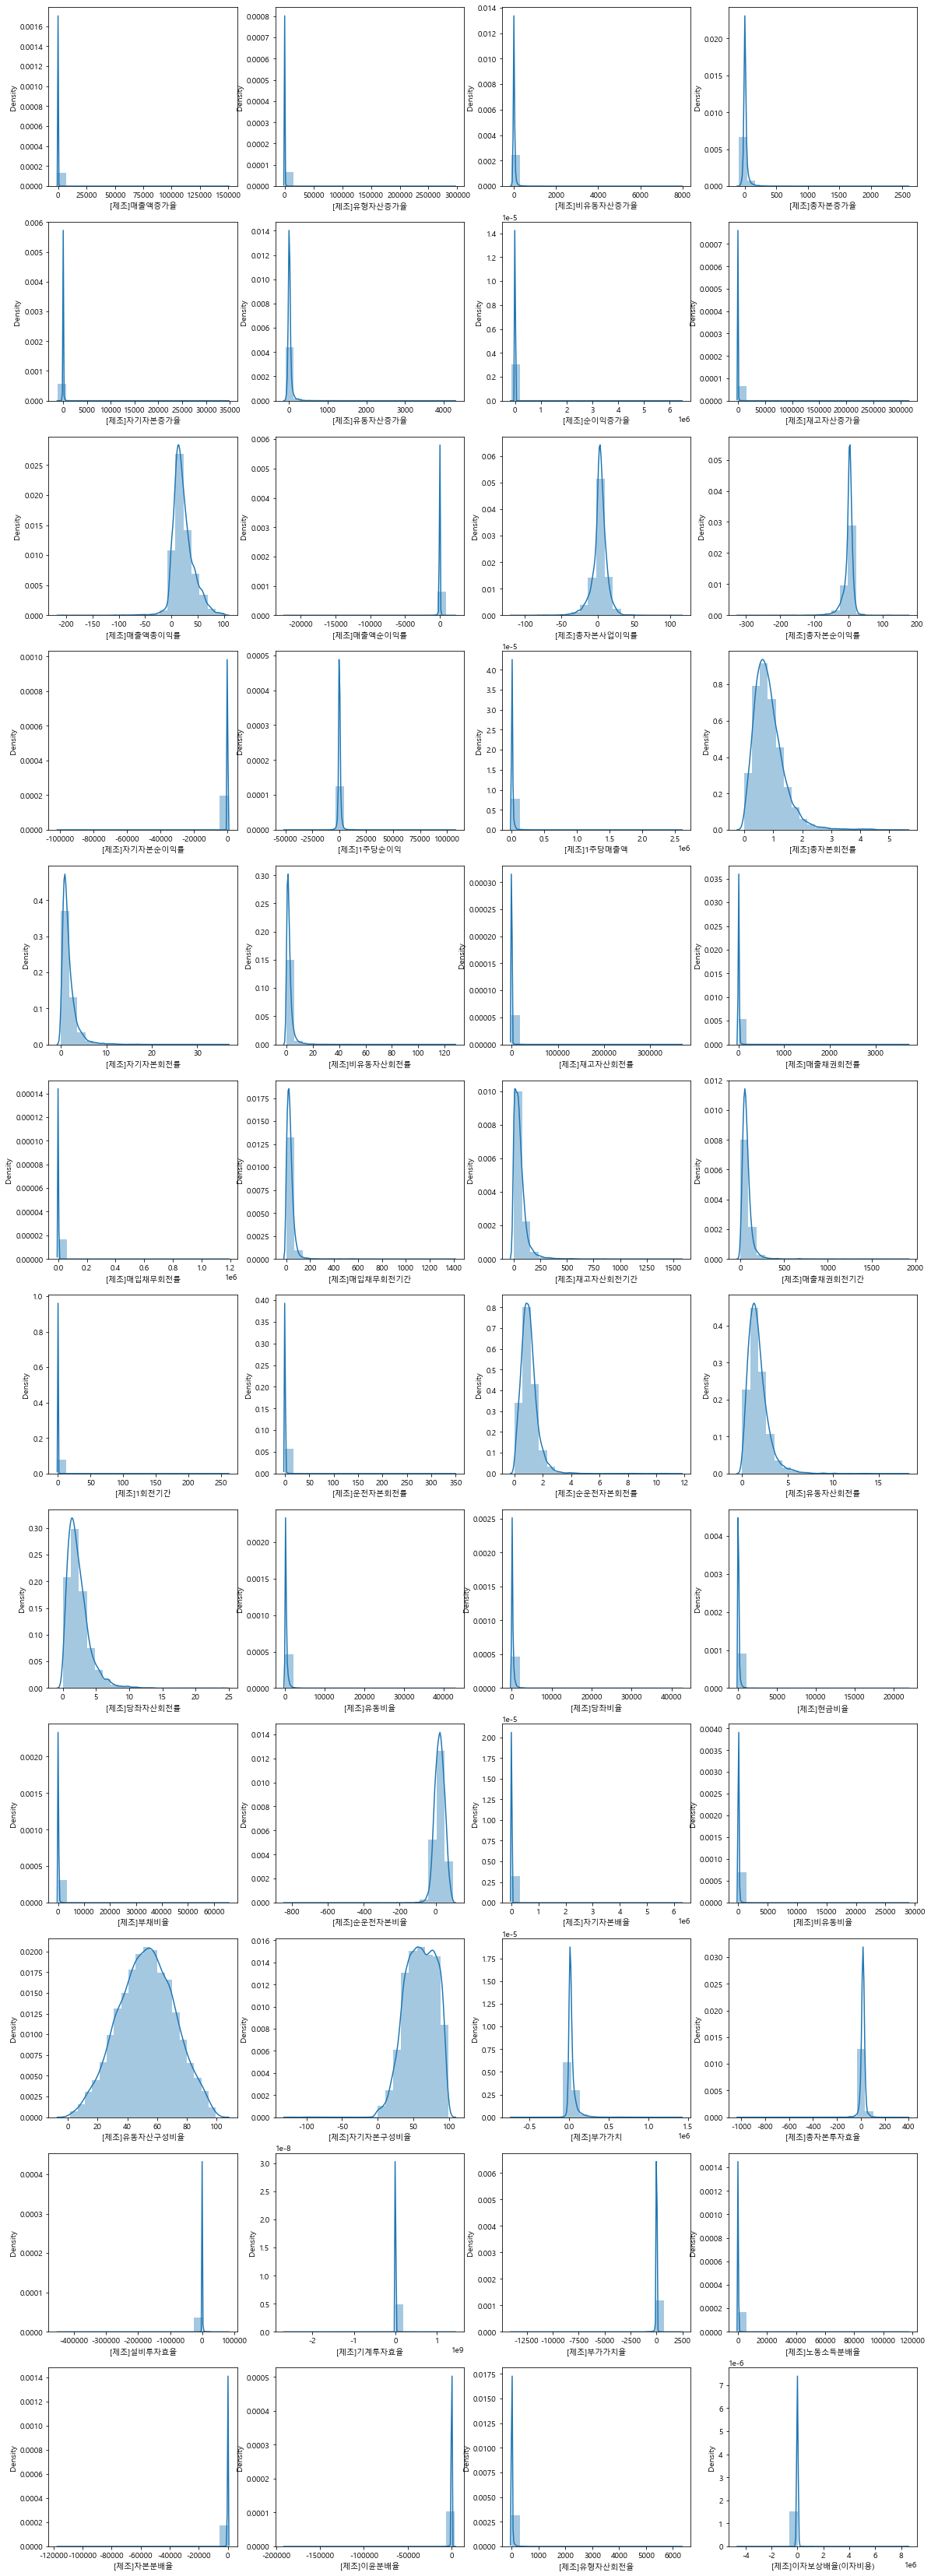

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 4
row_n = 12

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(df_n.columns):
    sns.distplot(df_n[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])